In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478741 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  478741 non-null  int64 
 1   Police_Force                                 478741 non-null  int64 
 2   Number_of_Vehicles                           478741 non-null  int64 
 3   Number_of_Casualties                         478741 non-null  int64 
 4   Date                                         478741 non-null  object
 5   Day_of_Week                                  478741 non-null  int64 
 6   Time                                         478727 non-null  object
 7   Local_Authority_(District)                   478741 non-null  int64 
 8   Local_Authority_(Highway)                    478741 non-null  object
 9   1st_Road_Class                               478741 non-null  int64 
 

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  121259 non-null  int64 
 1   Police_Force                                 121259 non-null  int64 
 2   Number_of_Vehicles                           121259 non-null  int64 
 3   Number_of_Casualties                         121259 non-null  int64 
 4   Date                                         121259 non-null  object
 5   Day_of_Week                                  121259 non-null  int64 
 6   Time                                         121258 non-null  object
 7   Local_Authority_(District)                   121259 non-null  int64 
 8   Local_Authority_(Highway)                    121259 non-null  object
 9   1st_Road_Class                               121259 non-null  int64 
 

In [5]:
train.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [6]:
test.isnull().sum()

Accident_ID                                     0
Police_Force                                    0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            1
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
2nd_Road_Class                                  0
2nd_Road_Number                                 0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                        39


In [7]:
train.columns[train.isnull().any()]


Index(['Time', 'Road_Surface_Conditions', 'Special_Conditions_at_Site'], dtype='object')

In [8]:
test.columns[test.isnull().any()]

Index(['Time', 'Road_Surface_Conditions', 'Special_Conditions_at_Site'], dtype='object')

In [9]:
train.duplicated().value_counts()

False    478741
dtype: int64

In [10]:
train.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom


In [11]:
def ari(df):
    df['total_casualties']=df.groupby('postcode')['Number_of_Casualties'].transform('sum')
    df['accident_count']=df.groupby('postcode')['Accident_ID'].transform('count')
    df['accident_risk_index']=round(df['total_casualties']/df['accident_count'],2)
    return df

In [12]:
train = ari(train)

In [13]:
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,11,6,1.83
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,None,None,1,No,England,S35 4EZ,United Kingdom,4,3,1.33
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,None,None,1,No,England,BN21 2XR,United Kingdom,16,12,1.33
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom,20,12,1.67
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,None,None,1,No,England,DN20 0QF,United Kingdom,9,6,1.50


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


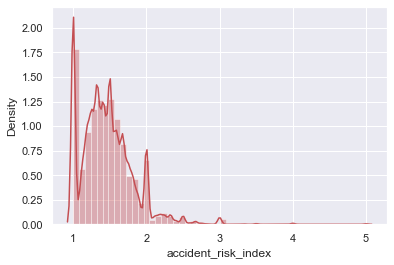

In [14]:
sns.set_theme()
ax = sns.distplot(train['accident_risk_index'], color='r')

In [15]:
train['accident_risk_index'].describe()

count    478741.000000
mean          1.463439
std           0.361019
min           1.000000
25%           1.220000
50%           1.420000
75%           1.670000
max           5.000000
Name: accident_risk_index, dtype: float64

In [16]:
def count_plot(df,col,rot=None):
  _=plt.figure(figsize=(8,6))
  _=sns.countplot(x=df[col],order=df[col].value_counts().index)
  _=plt.title(col.capitalize()+" Distribution",fontsize=25)
  _=plt.xlabel(col,fontsize=20)
  _=plt.xticks(fontsize=14,rotation=rot)

In [17]:
def box_plot(df,col,rot=None):
  _=plt.figure(figsize=(8,6))
  _=sns.boxplot(y=df[col])
  _=plt.title(col.capitalize()+" Distribution",fontsize=25)
  _=plt.ylabel(col,fontsize=20,rotation=rot)
  _=plt.yticks(fontsize=14)

In [18]:
def side_by_side_plot(df,grp,valcol,rot=None):
  clr="tab10"
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
  fig.tight_layout()
  sns.kdeplot(x=df[valcol], hue=df[grp],ax=ax1,palette=clr)
  ax1.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax1.set_xlabel(valcol,fontsize=20)
  sns.boxplot(x=df[grp],y=df[valcol],ax=ax2)
  ax2.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax2.set_xlabel(grp,fontsize=20)
  ax2.tick_params(rotation=rot)

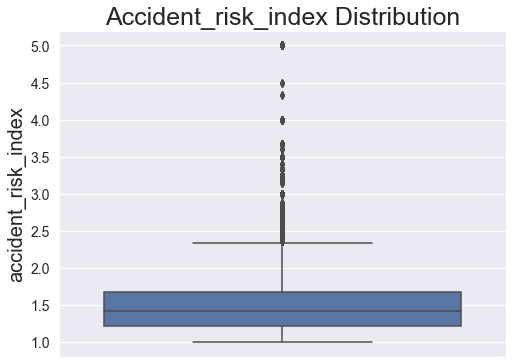

In [19]:
box_plot(train, 'accident_risk_index', rot = 90)

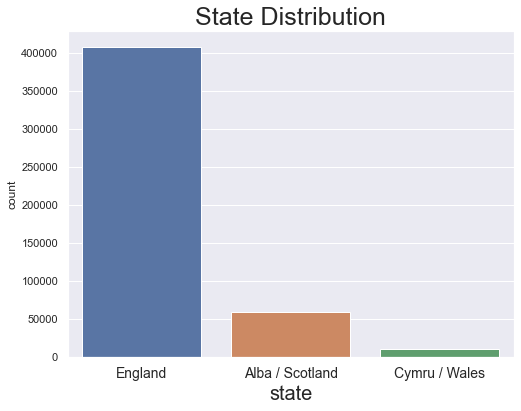

In [20]:
count_plot(train,col='state')

We can see from the plots that England has a much higher accidents as compare to Scotland and wales

In [21]:
train['state'].value_counts()

England            407853
Alba / Scotland     59667
Cymru / Wales       11221
Name: state, dtype: int64

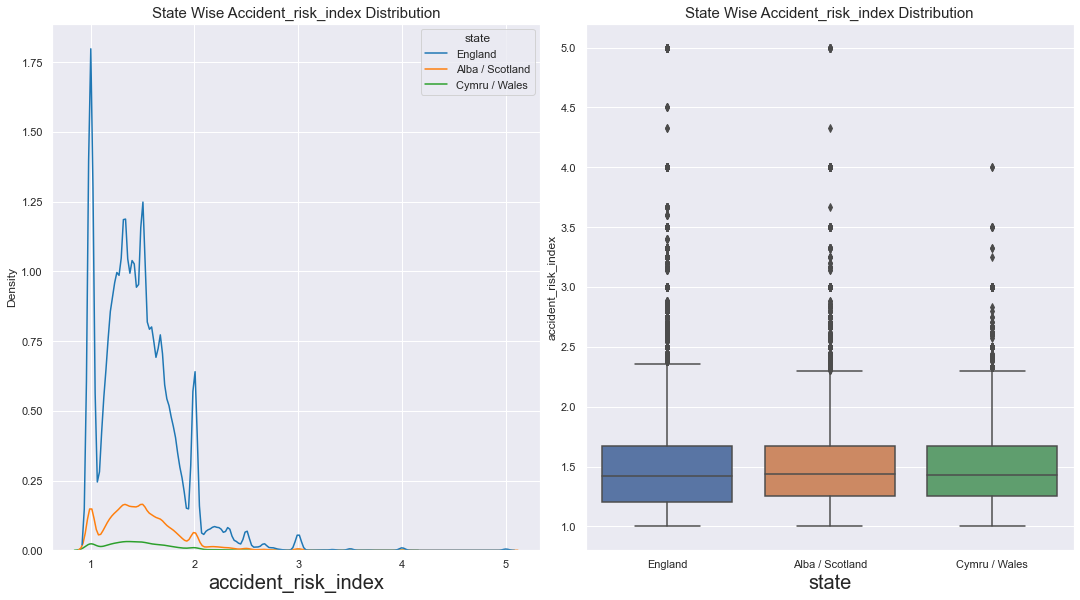

In [22]:
side_by_side_plot(train,'state', 'accident_risk_index')

In [23]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [24]:
group_summary(train, 'state', 'accident_risk_index')

,state,count,mean,std,min,25%,50%,75%,max
0,Alba / Scotland,59667.0,1.477671,0.348460,1.0,1.25,1.44,1.67,5.0
1,Cymru / Wales,11221.0,1.464700,0.336304,1.0,1.25,1.43,1.67,4.0
2,England,407853.0,1.461322,0.363427,1.0,1.20,1.42,1.67,5.0


In [25]:
train['postcode'].nunique()

95625

In [26]:
def postcode_split(df):
  df['postcode']=df['postcode'].str.strip()
  df['area']=[re.search(r"([A-Z]+)",i).group(1) for i in df['postcode']]
  df['district']=[re.search(r"[A-Z]+([0-9]+)",i).group(1) if re.search(r"[A-Z]+([0-9]+)",i) else "none" for i in df['postcode']]
  df['sector']=[re.search(r"(\s[0-9]+)",i).group(1) if re.search(r"(\s[0-9]+?)",i) else "none" for i in df['postcode']]
  df['unit']=[re.search(r"\s[0-9]+([A-Z]+)",i).group(1) if re.search(r"\s[0-9]+?([A-Z]+)",i) else "none" for i in df['postcode']]
  return df

In [27]:
train = postcode_split(train)

In [28]:
train.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,state,postcode,country,total_casualties,accident_count,accident_risk_index,area,district,sector,unit
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,England,OX3 9UP,United Kingdom,11,6,1.83,OX,3,9,UP
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,England,S35 4EZ,United Kingdom,4,3,1.33,S,35,4,EZ


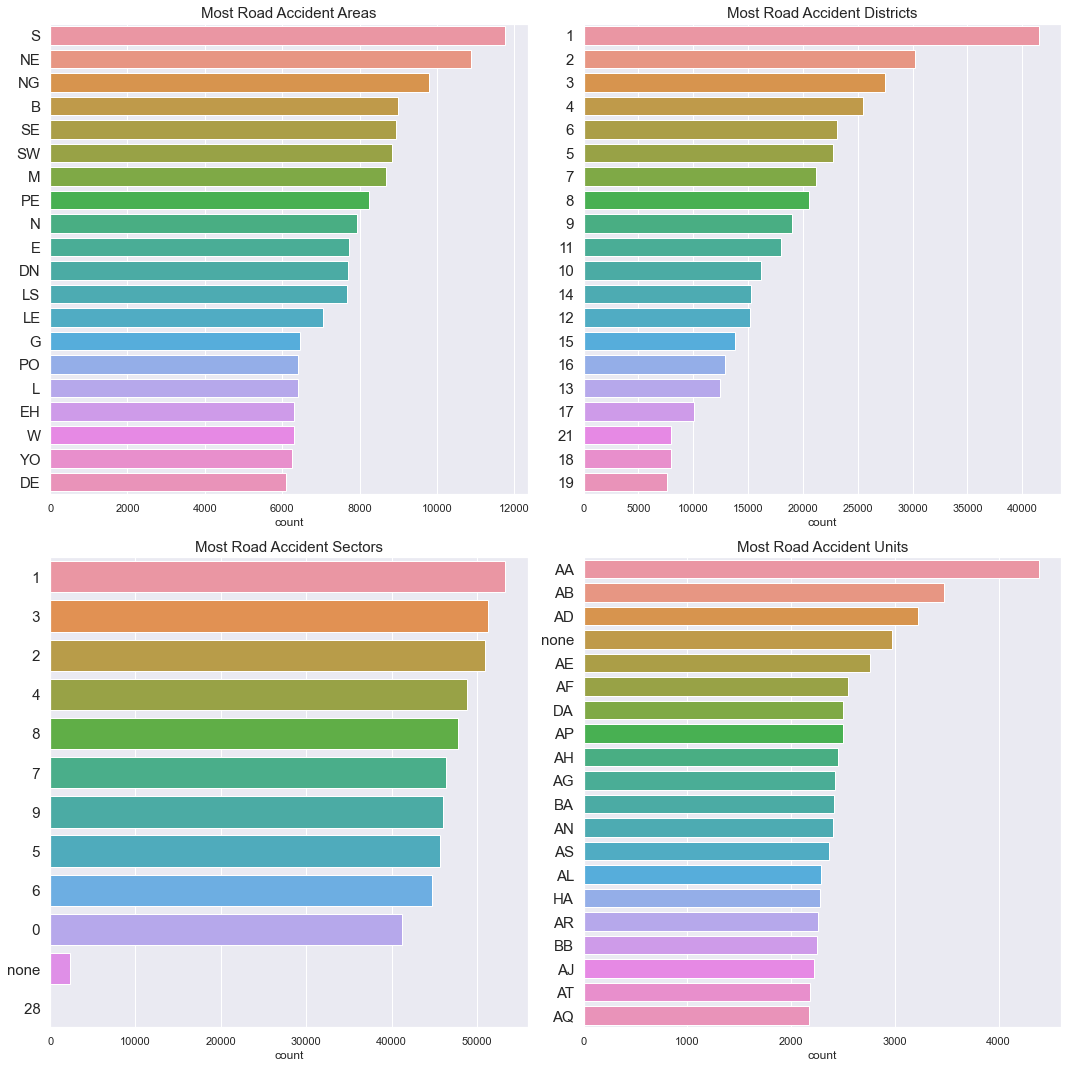

In [29]:
fig=plt.subplots(figsize=(15,15))
for i,col in enumerate(['area','district','sector','unit']):
  _=plt.subplot(2,2,i+1)
  df=train.groupby(col)['accident_risk_index'].agg({'count'}).reset_index().nlargest(20,'count')
  _=sns.barplot(data=df,x='count',y=col)
  _=plt.title("Most Road Accident "+col.capitalize()+'s',fontsize=15)
  _=plt.ylabel("")
  _=plt.yticks(fontsize=15)
  _=plt.tight_layout()
plt.show()  

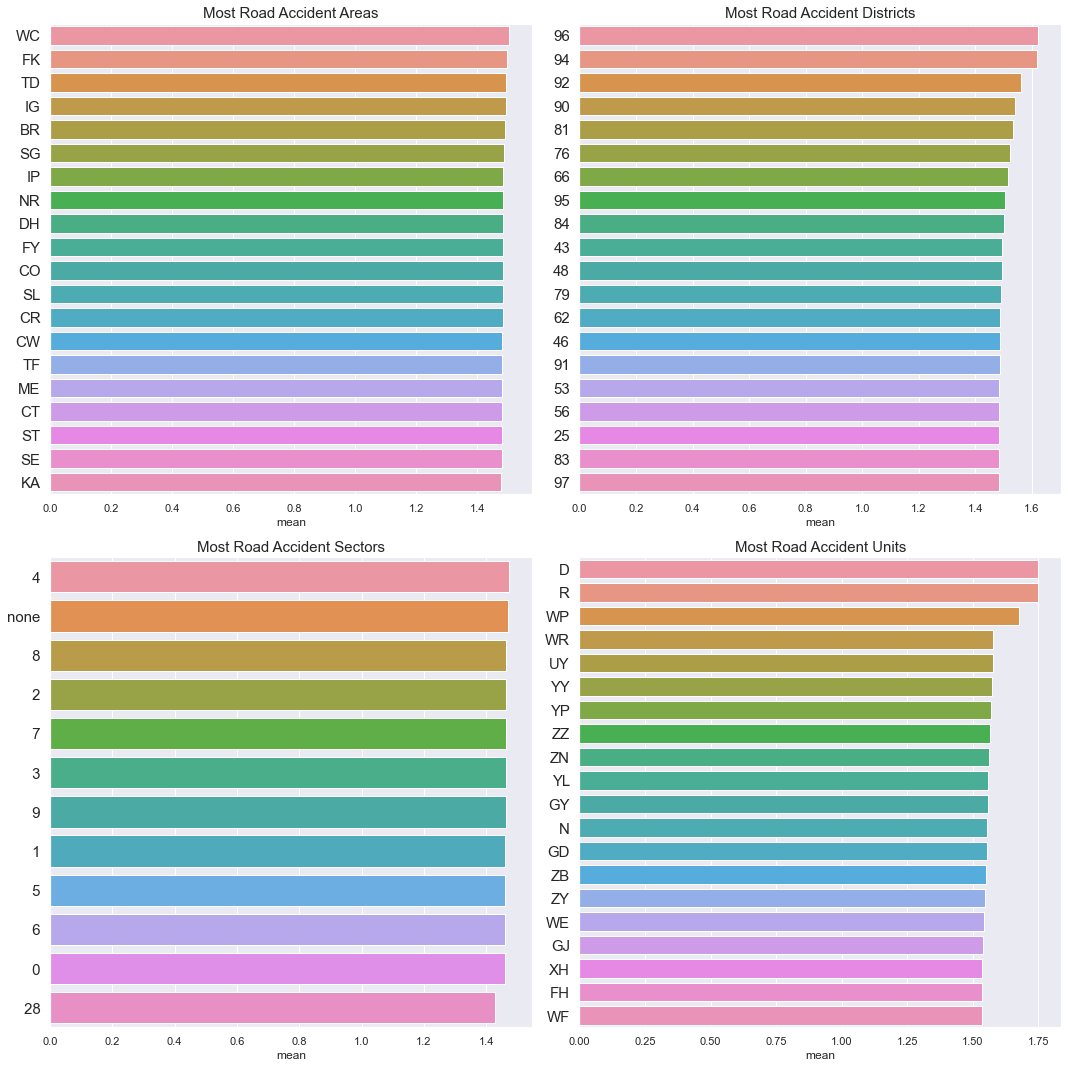

In [30]:
fig=plt.subplots(figsize=(15,15))
for i,col in enumerate(['area','district','sector','unit']):
  _=plt.subplot(2,2,i+1)
  df=train.groupby(col)['Number_of_Casualties'].agg({'mean'}).reset_index().nlargest(20,'mean')
  _=sns.barplot(data=df,x='mean',y=col)
  _=plt.title("Most Road Accident "+col.capitalize()+'s',fontsize=15)
  _=plt.ylabel("")
  _=plt.yticks(fontsize=15)
  _=plt.tight_layout()
plt.show()  

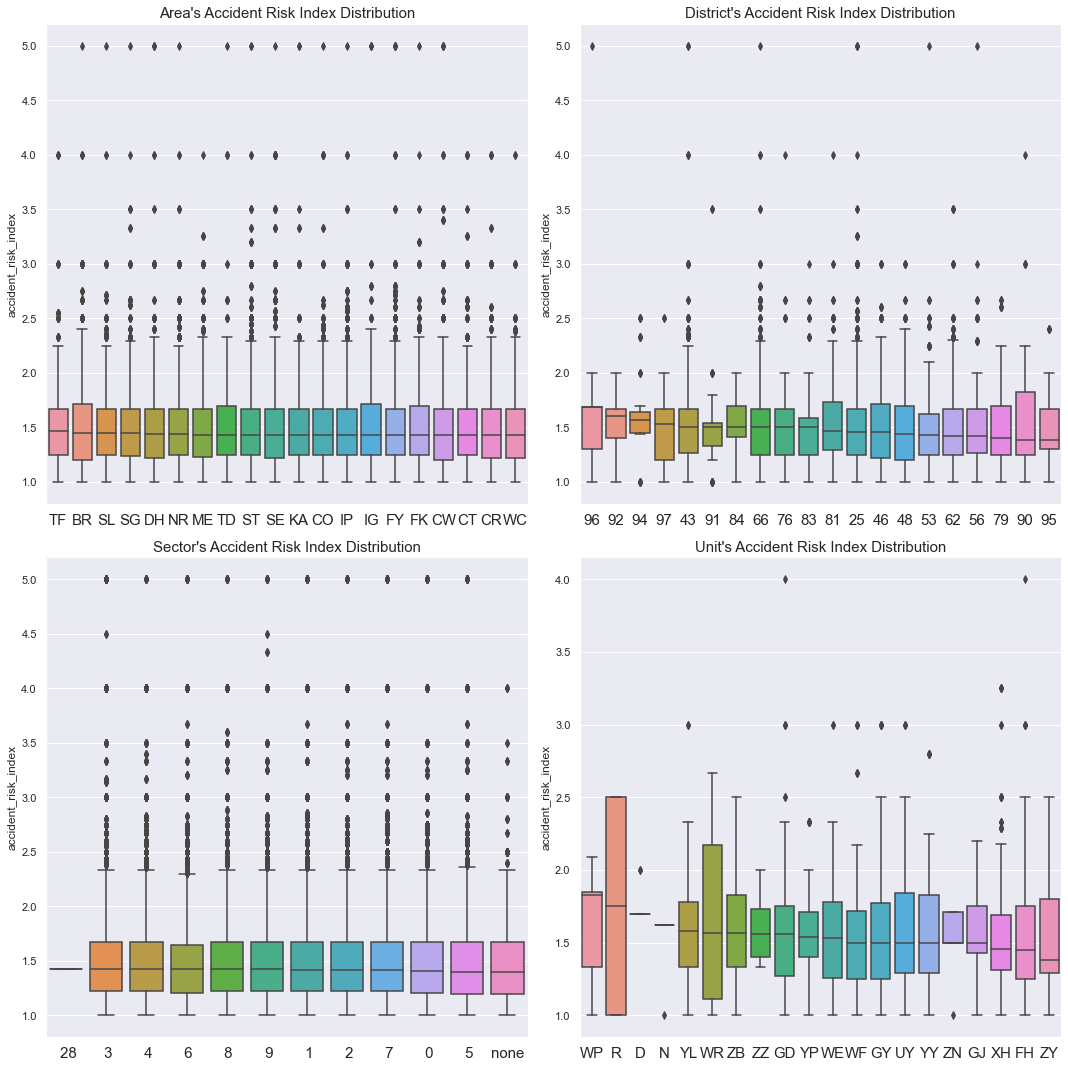

In [31]:
fig=plt.subplots(figsize=(15,15))
for i,col in enumerate(['area','district','sector','unit']):
  _=plt.subplot(2,2,i+1)
  df=train.groupby(col)['accident_risk_index'].agg({'mean'}).reset_index().nlargest(20,'mean')
  df1=train[train[col].isin(list(df[col].values))][[col,'accident_risk_index']]
  order = df1.groupby(col)["accident_risk_index"].median().sort_values(ascending=False).index
  _=sns.boxplot(x=df1[col],y=df1['accident_risk_index'],order=order)
  _=plt.title(col.capitalize()+"'s"+" Accident Risk Index Distribution",fontsize=15)
  _=plt.xlabel("")
  _=plt.xticks(fontsize=15)
  _=plt.tight_layout()
plt.show()  

The above boxplots are ordered by the median value and it explains that there is a lot of differences between most road accident locations and the locations which have the most accident casualties and also most accident risk index locations.

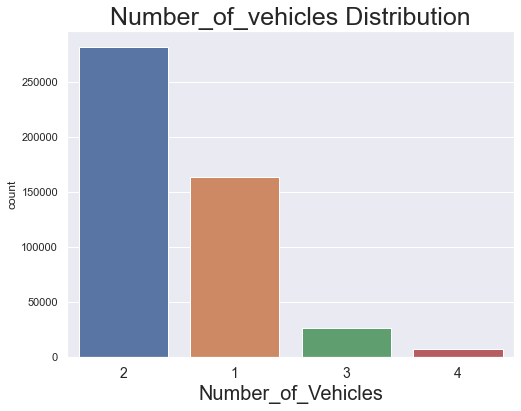

In [33]:
count_plot(train, col = 'Number_of_Vehicles')

In [34]:
train['Number_of_Vehicles'].value_counts()

2    281598
1    163061
3     26849
4      7233
Name: Number_of_Vehicles, dtype: int64

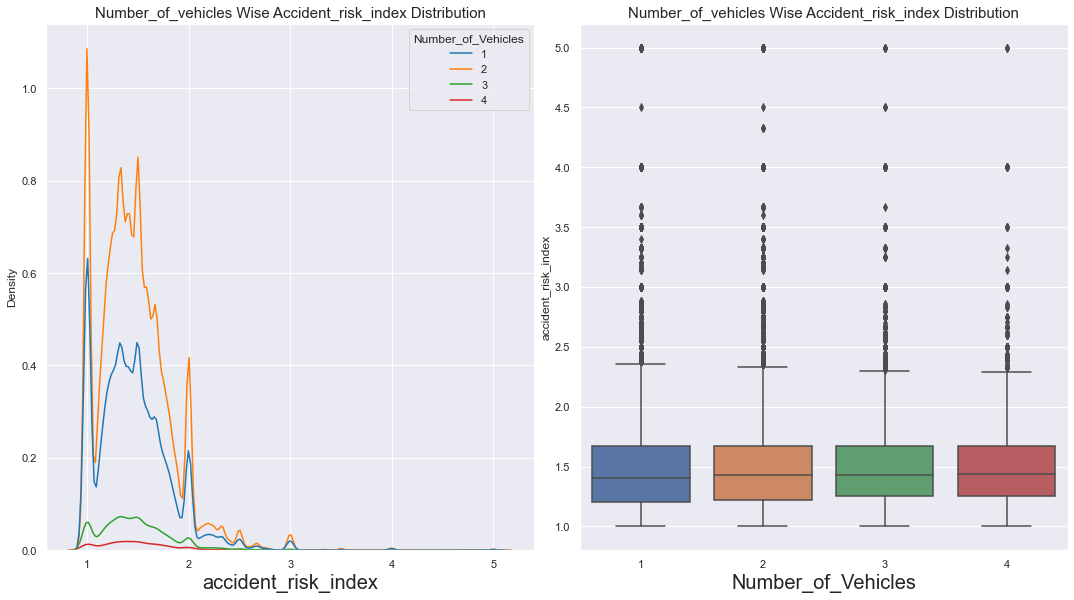

In [35]:
side_by_side_plot(train, 'Number_of_Vehicles', 'accident_risk_index')

In [36]:
group_summary(train, 'Number_of_Vehicles', 'accident_risk_index')

,Number_of_Vehicles,count,mean,std,min,25%,50%,75%,max
3,4,7233.0,1.483585,0.364969,1.0,1.25,1.44,1.67,5.0
2,3,26849.0,1.476658,0.356312,1.0,1.25,1.43,1.67,5.0
1,2,281598.0,1.465068,0.355599,1.0,1.22,1.43,1.67,5.0
0,1,163061.0,1.457555,0.370659,1.0,1.20,1.40,1.67,5.0


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


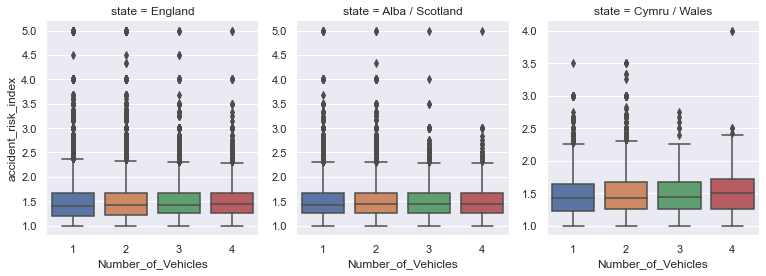

In [37]:
sns.catplot(x='Number_of_Vehicles', y='accident_risk_index', col = 'state', col_wrap=3, sharey=False, sharex=False, data = train, height = 4, aspect=.9, kind='box');

In [39]:
group_summary(train, ['state', 'Number_of_Vehicles'], 'accident_risk_index')

,state,Number_of_Vehicles,count,mean,std,min,25%,50%,75%,max
7,Cymru / Wales,4,218.0,1.518028,0.414056,1.0,1.25,1.50,1.71,4.00
3,Alba / Scotland,4,1300.0,1.484585,0.352338,1.0,1.25,1.44,1.67,5.00
2,Alba / Scotland,3,3894.0,1.484271,0.346021,1.0,1.25,1.44,1.67,5.00
11,England,4,5715.0,1.482044,0.365798,1.0,1.25,1.44,1.67,5.00
1,Alba / Scotland,2,30103.0,1.479450,0.345103,1.0,1.25,1.44,1.67,5.00
10,England,3,22272.0,1.475496,0.359351,1.0,1.25,1.43,1.67,5.00
0,Alba / Scotland,1,24370.0,1.474050,0.352725,1.0,1.25,1.43,1.67,5.00
6,Cymru / Wales,3,683.0,1.471171,0.311716,1.0,1.25,1.44,1.67,2.75
5,Cymru / Wales,2,6808.0,1.468440,0.334529,1.0,1.25,1.43,1.67,3.50
9,England,2,244687.0,1.463205,0.357395,1.0,1.22,1.42,1.67,5.00


The above plot explains that there are mostly 1 or 2 vehicles at the location of the accident.
The average accident risk index is almost the same in all vehicle groups.

Let's compare the state-wise total accident by each number of vehicles at the accident location.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


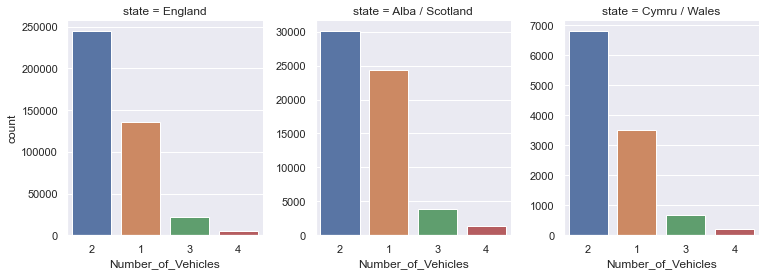

In [44]:
sns.catplot(x='Number_of_Vehicles',y='count',
                 col='state',col_wrap=3,sharey=False,sharex=False,
            data=(train.astype({'Number_of_Vehicles':'str'}).groupby(['state','Number_of_Vehicles'])
            ['Accident_ID'].agg({'count'}).reset_index().sort_values('count',ascending=False)),
                 height=4, aspect=.9,kind="bar");

In [45]:
(train.astype({'Number_of_Vehicles':'str'}).groupby(['state','Number_of_Vehicles'])
            .agg({'Accident_ID':'count'}).reset_index().sort_values('Accident_ID',ascending=False))

,state,Number_of_Vehicles,Accident_ID
9,England,2,244687
8,England,1,135179
1,Alba / Scotland,2,30103
0,Alba / Scotland,1,24370
10,England,3,22272
5,Cymru / Wales,2,6808
11,England,4,5715
2,Alba / Scotland,3,3894
4,Cymru / Wales,1,3512
3,Alba / Scotland,4,1300


In all states, most of the accidents happened due to two-vehicle crashes.
Let's compare the state-wise total accident casualties by each number of vehicles at the accident location.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


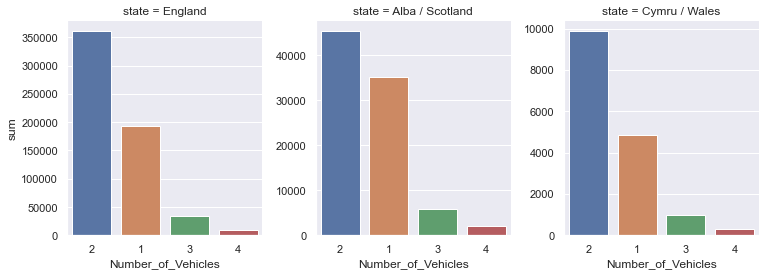

In [46]:
sns.catplot(x = 'Number_of_Vehicles', y = 'sum',
           col = 'state', col_wrap=3, sharey=False, sharex=False,
           data= (train.astype({'Number_of_Vehicles': 'str'}).groupby(['state', 'Number_of_Vehicles'])
                 ['Number_of_Casualties'].agg({'sum'}).reset_index().sort_values('sum', ascending = False)),
           height = 4, aspect=.9, kind = 'bar');

In [47]:
(train.astype({'Number_of_Vehicles':'str'}).groupby(['state','Number_of_Vehicles'])
            .agg({'Number_of_Casualties':'sum'}).reset_index().sort_values('Number_of_Casualties',ascending=False))

,state,Number_of_Vehicles,Number_of_Casualties
9,England,2,361354
8,England,1,192663
1,Alba / Scotland,2,45382
0,Alba / Scotland,1,35184
10,England,3,33402
5,Cymru / Wales,2,9881
11,England,4,8678
2,Alba / Scotland,3,5952
4,Cymru / Wales,1,4855
3,Alba / Scotland,4,1981


In all states, most of the accident casualties happened due to two-vehicle crashes.

Let's comapre the accident risk index with road type.

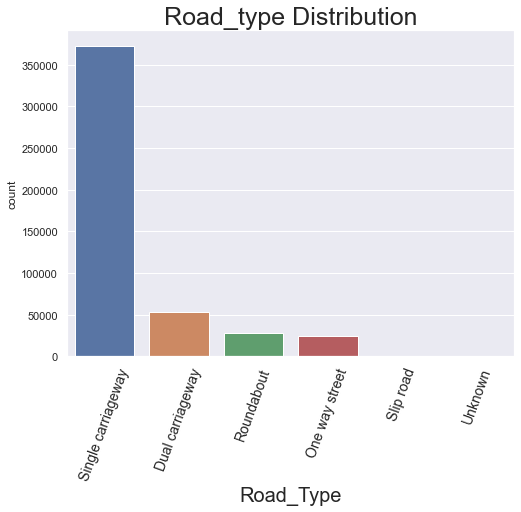

In [49]:
count_plot(train, 'Road_Type', rot = 70)

In [50]:
train['Road_Type'].value_counts()

Single carriageway    372554
Dual carriageway       52783
Roundabout             28541
One way street         24311
Slip road                523
Unknown                   29
Name: Road_Type, dtype: int64

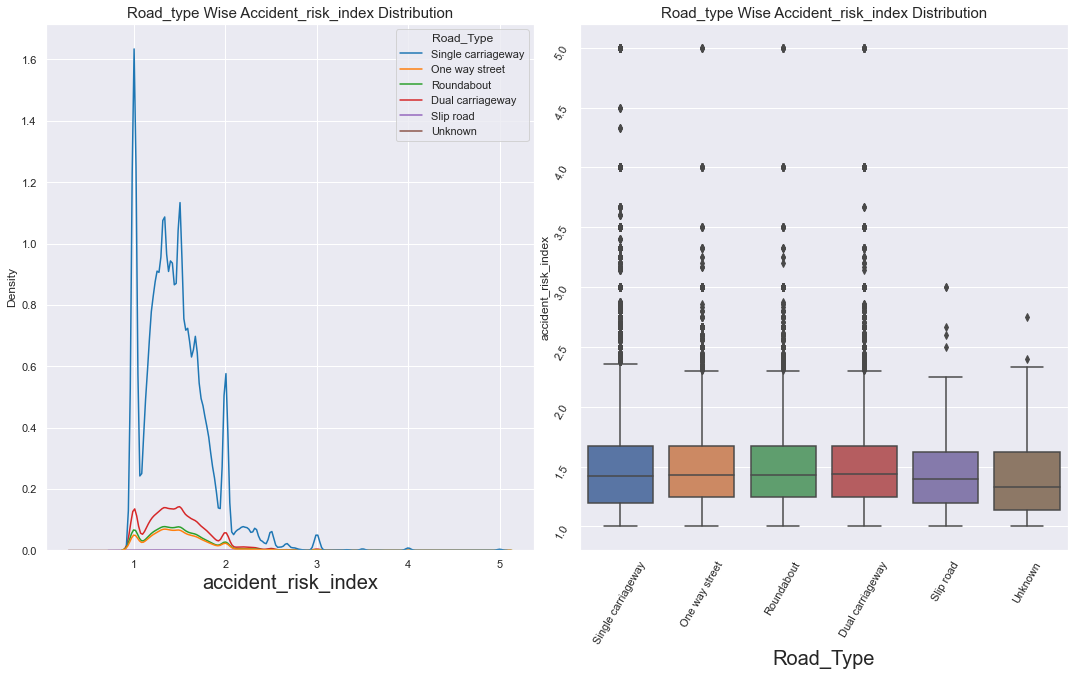

In [54]:
side_by_side_plot(train, 'Road_Type', 'accident_risk_index', rot = 60)

In [55]:
group_summary(train, 'Road_Type', 'accident_risk_index')

,Road_Type,count,mean,std,min,25%,50%,75%,max
0,Dual carriageway,52783.0,1.478542,0.355665,1.0,1.25,1.44,1.67,5.00
1,One way street,24311.0,1.473911,0.337764,1.0,1.25,1.43,1.67,5.00
2,Roundabout,28541.0,1.471070,0.350267,1.0,1.25,1.43,1.67,5.00
3,Single carriageway,372554.0,1.460063,0.363995,1.0,1.20,1.42,1.67,5.00
5,Unknown,29.0,1.446207,0.469950,1.0,1.14,1.33,1.62,2.75
4,Slip road,523.0,1.441396,0.331476,1.0,1.20,1.40,1.62,3.00


The above plot explains that in all area most of roads are single carriageway.
The average accident risk index is almost the same in all road types.

Let's compare the state-wise accident risk index by type of the road.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


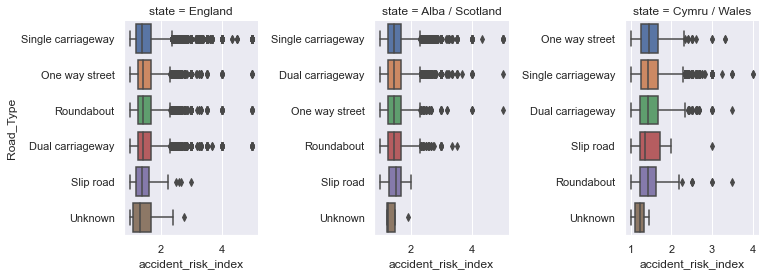

In [56]:
sns.catplot(x = 'accident_risk_index', y = 'Road_Type',
           col = 'state', col_wrap=3,sharey=False, sharex=False,
           data = train,
           height = 4, aspect=.9, kind='box')

In [57]:
group_summary(train, ['state', 'Road_Type'], 'accident_risk_index')

,state,Road_Type,count,mean,std,min,25%,50%,75%,max
4,Alba / Scotland,Slip road,74.0,1.489730,0.272517,1.0,1.2925,1.500,1.690,2.00
0,Alba / Scotland,Dual carriageway,14539.0,1.481373,0.340724,1.0,1.2500,1.440,1.670,5.00
1,Alba / Scotland,One way street,2715.0,1.480645,0.335057,1.0,1.2500,1.440,1.670,5.00
2,Alba / Scotland,Roundabout,2254.0,1.479374,0.329787,1.0,1.2500,1.440,1.670,3.50
12,England,Dual carriageway,36015.0,1.478287,0.362969,1.0,1.2500,1.430,1.670,5.00
3,Alba / Scotland,Single carriageway,40081.0,1.476016,0.353247,1.0,1.2500,1.430,1.670,5.00
13,England,One way street,20643.0,1.473093,0.339032,1.0,1.2500,1.430,1.670,5.00
17,England,Unknown,23.0,1.473043,0.506166,1.0,1.1050,1.330,1.685,2.75
7,Cymru / Wales,One way street,953.0,1.472455,0.317428,1.0,1.2500,1.440,1.670,3.33
14,England,Roundabout,25882.0,1.470675,0.352322,1.0,1.2500,1.430,1.670,5.00


The above plot explains that in all states the accident risk index is almost similar in all road types.

Let's compare the state-wise total accident count by type of the road.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


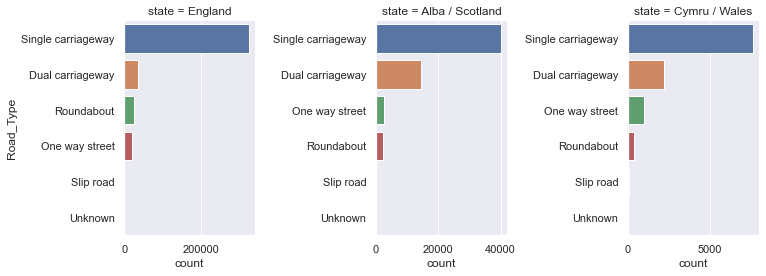

In [58]:
sns.catplot(x = 'count', y = 'Road_Type',
            col = 'state', col_wrap=3, sharey=False, sharex=False,
           data = (train.astype({'Road_Type':'str'}).groupby(['state', 'Road_Type'])
                  ['Accident_ID'].agg({'count'}).reset_index().sort_values('count', ascending=False)),
           height = 4, aspect=.9, kind = 'bar')

In [59]:
(train.astype({'Road_Type':'str'}).groupby(['state','Road_Type'])
            ['Accident_ID'].agg({'count'}).reset_index().sort_values('count',ascending=False))

,state,Road_Type,count
15,England,Single carriageway,324882
3,Alba / Scotland,Single carriageway,40081
12,England,Dual carriageway,36015
14,England,Roundabout,25882
13,England,One way street,20643
0,Alba / Scotland,Dual carriageway,14539
9,Cymru / Wales,Single carriageway,7591
1,Alba / Scotland,One way street,2715
2,Alba / Scotland,Roundabout,2254
6,Cymru / Wales,Dual carriageway,2229


Most of the accidents happened in single carriageways and in the state of England.

Let's compare the state-wise total accident casualties by type of the road.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


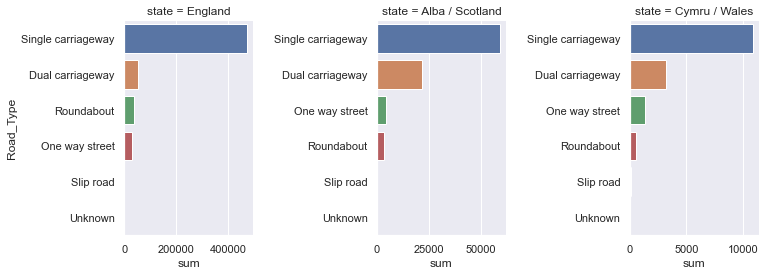

In [61]:
sns.catplot(x = 'sum', y = 'Road_Type',
            col = 'state', col_wrap=3, sharey=False, sharex=False,
           data = (train.astype({'Road_Type':'str'}).groupby(['state', 'Road_Type'])
                  ['Number_of_Casualties'].agg({'sum'}).reset_index().sort_values('sum', ascending=False)),
           height = 4, aspect=.9, kind = 'bar')

In [63]:
(train.astype({'Road_Type': 'str'}).groupby(['state', 'Road_Type'])
['Number_of_Casualties'].agg({'sum'}).reset_index().sort_values('sum', ascending = False))

,state,Road_Type,sum
15,England,Single carriageway,471287
3,Alba / Scotland,Single carriageway,59159
12,England,Dual carriageway,54692
14,England,Roundabout,38865
13,England,One way street,30654
0,Alba / Scotland,Dual carriageway,21658
9,Cymru / Wales,Single carriageway,10872
1,Alba / Scotland,One way street,4129
2,Alba / Scotland,Roundabout,3434
6,Cymru / Wales,Dual carriageway,3181


Most of the accident casualties are happened in single carriageway and in the state of England.

Let's comapre the accident risk index with speed limit.

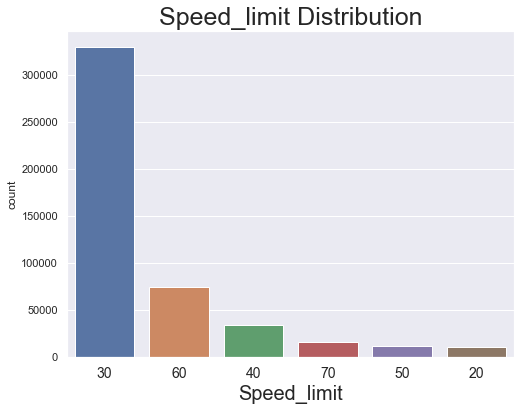

In [66]:
count_plot(train, 'Speed_limit')

In [69]:
train['Speed_limit'].value_counts()

30    329800
60     75015
40     34108
70     16147
50     12257
20     11414
Name: Speed_limit, dtype: int64

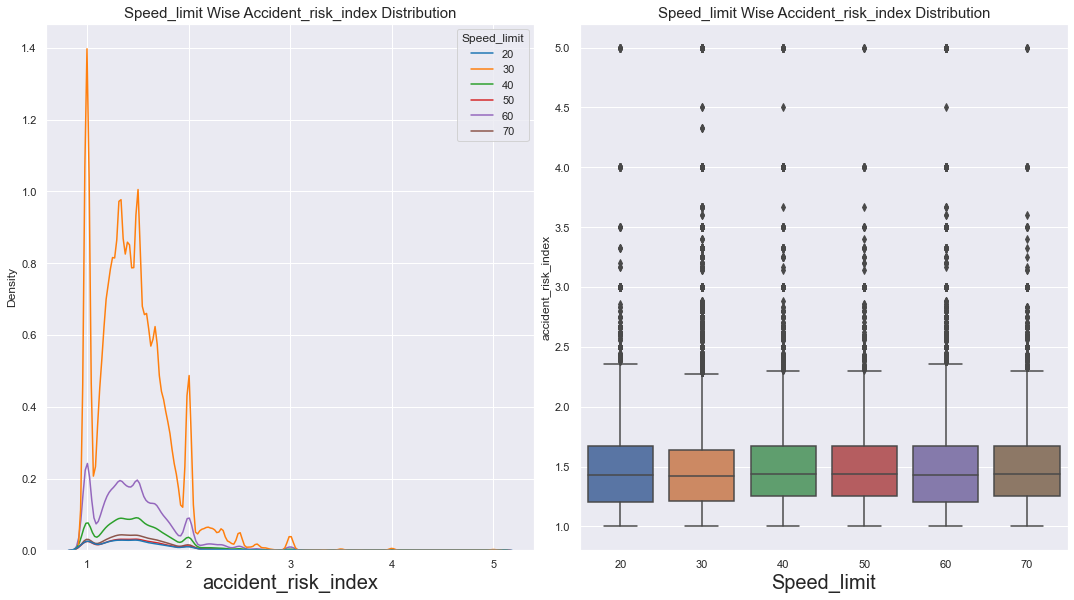

In [70]:
side_by_side_plot(train, 'Speed_limit', 'accident_risk_index')

In [71]:
group_summary(train, 'Speed_limit', 'accident_risk_index')

,Speed_limit,count,mean,std,min,25%,50%,75%,max
5,70,16147.0,1.490072,0.361573,1.0,1.25,1.44,1.67,5.0
3,50,12257.0,1.488402,0.374827,1.0,1.25,1.44,1.67,5.0
2,40,34108.0,1.488284,0.373265,1.0,1.25,1.44,1.67,5.0
0,20,11414.0,1.473661,0.392917,1.0,1.20,1.43,1.67,5.0
4,60,75015.0,1.472012,0.387058,1.0,1.20,1.43,1.67,5.0
1,30,329800.0,1.456334,0.351503,1.0,1.21,1.42,1.64,5.0


The above plot explains that in all area most of roads have 30mph speed limit.

The average accident risk index is almost the same in all speed limit category.

Let's compare the state-wise accident risk index by type of the road.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


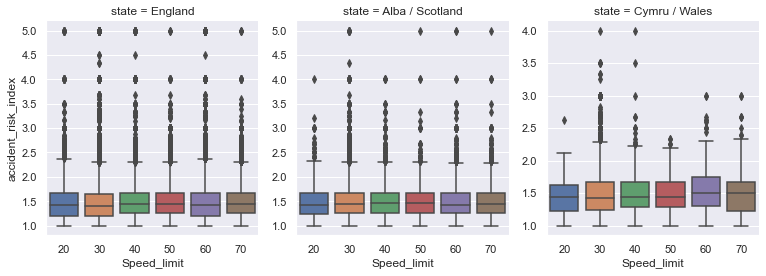

In [73]:
sns.catplot(x= 'Speed_limit', y = 'accident_risk_index',
           col= 'state', col_wrap= 3, sharey=False, sharex=False,
           data = train,
           height = 4, aspect=.9, kind='box')

In [74]:
group_summary(train, ['state', 'Speed_limit'], 'accident_risk_index')

,state,Speed_limit,count,mean,std,min,25%,50%,75%,max
10,Cymru / Wales,60,279.0,1.533584,0.369822,1.0,1.295,1.500,1.7500,3.00
5,Alba / Scotland,70,2288.0,1.504017,0.371938,1.0,1.250,1.450,1.6750,5.00
8,Cymru / Wales,40,488.0,1.495820,0.341757,1.0,1.285,1.440,1.6700,4.00
2,Alba / Scotland,40,4408.0,1.494027,0.352372,1.0,1.250,1.460,1.6700,4.00
11,Cymru / Wales,70,284.0,1.491937,0.368900,1.0,1.220,1.500,1.6700,3.00
15,England,50,10217.0,1.488751,0.380203,1.0,1.250,1.440,1.6700,5.00
17,England,70,13575.0,1.487683,0.359616,1.0,1.250,1.440,1.6700,5.00
14,England,40,29212.0,1.487292,0.376819,1.0,1.250,1.440,1.6700,5.00
9,Cymru / Wales,50,156.0,1.487179,0.298700,1.0,1.290,1.435,1.6700,2.33
3,Alba / Scotland,50,1884.0,1.486608,0.350486,1.0,1.250,1.460,1.6700,5.00


The above plot explains that in all states the accident risk index is almost similar in all speed limit category.

Let's see the speed limit of each road type.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


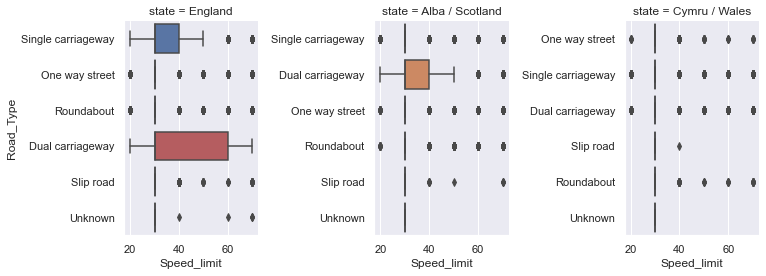

In [76]:
sns.catplot(x='Speed_limit', y = 'Road_Type',
           col = 'state', col_wrap=3, sharey= False, sharex=False,
           data = train,
           height = 4, aspect=.9, kind='box');

The above plot explains that the speed limit changes based on the road types in all states of the united kingdom.

Let's compare the state-wise total accident count by speed limit category.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


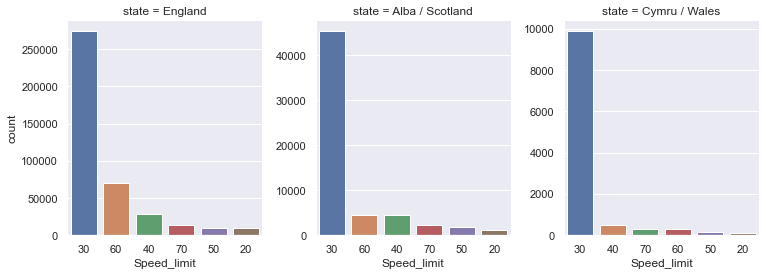

In [78]:
sns.catplot(x = 'Speed_limit', y = 'count',
           col = 'state', col_wrap= 3, sharey=False, sharex=False,
           data = (train.astype({'Speed_limit': 'str'}).groupby(['state', 'Speed_limit'])
                  ['Accident_ID'].agg({'count'}).reset_index().sort_values('count', ascending = False)),
           height = 4, aspect=.9, kind = 'bar')

In [79]:
(train.astype({'Speed_limit':'str'}).groupby(['state', 'Speed_limit'])
['Accident_ID'].agg({'count'}).reset_index().sort_values('count', ascending = False))

,state,Speed_limit,count
13,England,30,274518
16,England,60,70271
1,Alba / Scotland,30,45390
14,England,40,29212
17,England,70,13575
15,England,50,10217
12,England,20,10060
7,Cymru / Wales,30,9892
4,Alba / Scotland,60,4465
2,Alba / Scotland,40,4408


Most of the accident casualties happened in 30mph speed limit roads and in the state of England.